## Project Overview 
- There hase been a recent observation of Overstock and its movement relative to the S&P 500. The observation is that as the market takes a dip the price of overstock moves inversely to the marke, showing a spike. Almost the sem bevavior as the volatility market. 

### Project Overview
- Will take 5 years of data for the S&P and correlate it to Overstock
- We will thene take a deep dive into every stock in the S&P over the last 5 years and find which is correlate dto Overstock. 
- This will give us a understanding of which stocks we could potentially buy on a market dip. 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas_datareader import data as web

### Fetching S&P data for the last 5 years

In [2]:
sandp = pd.DataFrame(web.DataReader("^GSPC", data_source = "yahoo", start = "2010-1-1", end = "2020-05-19")["Adj Close"])

In [3]:
sandp.columns = ["^GSPC"]

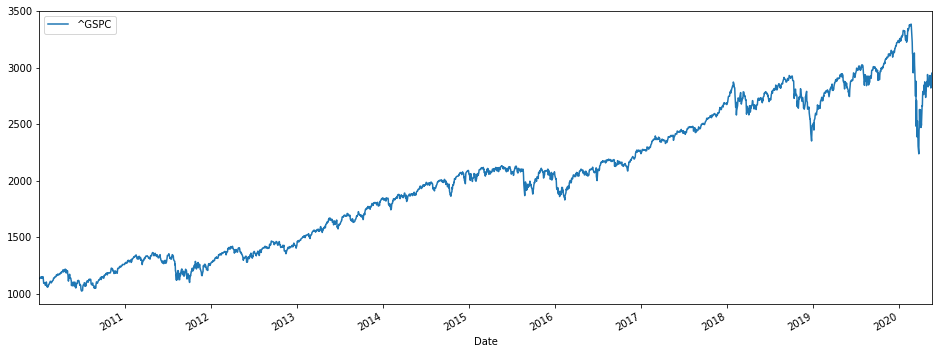

In [4]:
sandp.plot(figsize = (16,6))

## Fetching OverStock data

In [5]:
overstock = pd.DataFrame(web.DataReader("OSTK", data_source = "yahoo", start = "2010-1-1", end = "2020-05-19")["Adj Close"])

In [6]:
overstock.columns = ["OSTK"]

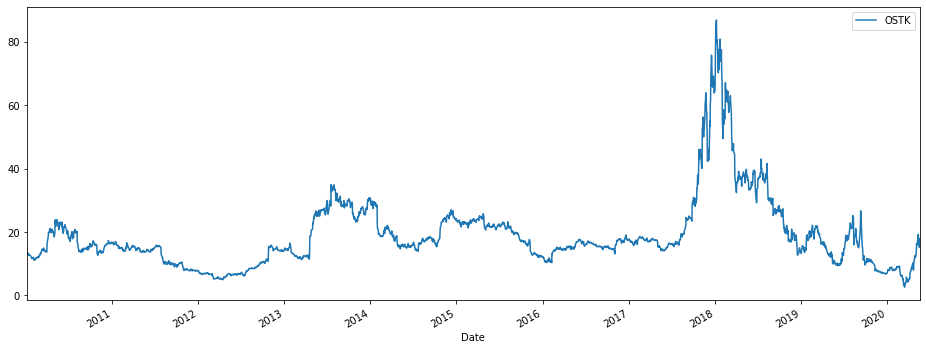

In [7]:
overstock.plot(figsize = (16,6))

## Importing Stock data 
- Importing all stocks Adj in the S&P orver the last 10 years 

In [8]:
stocks_data = pd.read_csv("resources/StockData.csv", index_col="Date")

### Concating all Data together
- Will add the S&P data and Overstock data to stock data file

In [9]:
stocks_data["OSTK"] = overstock

In [10]:
stocks_data["^GSPC"] = sandp

### looking at OSTK and S&P for the last year

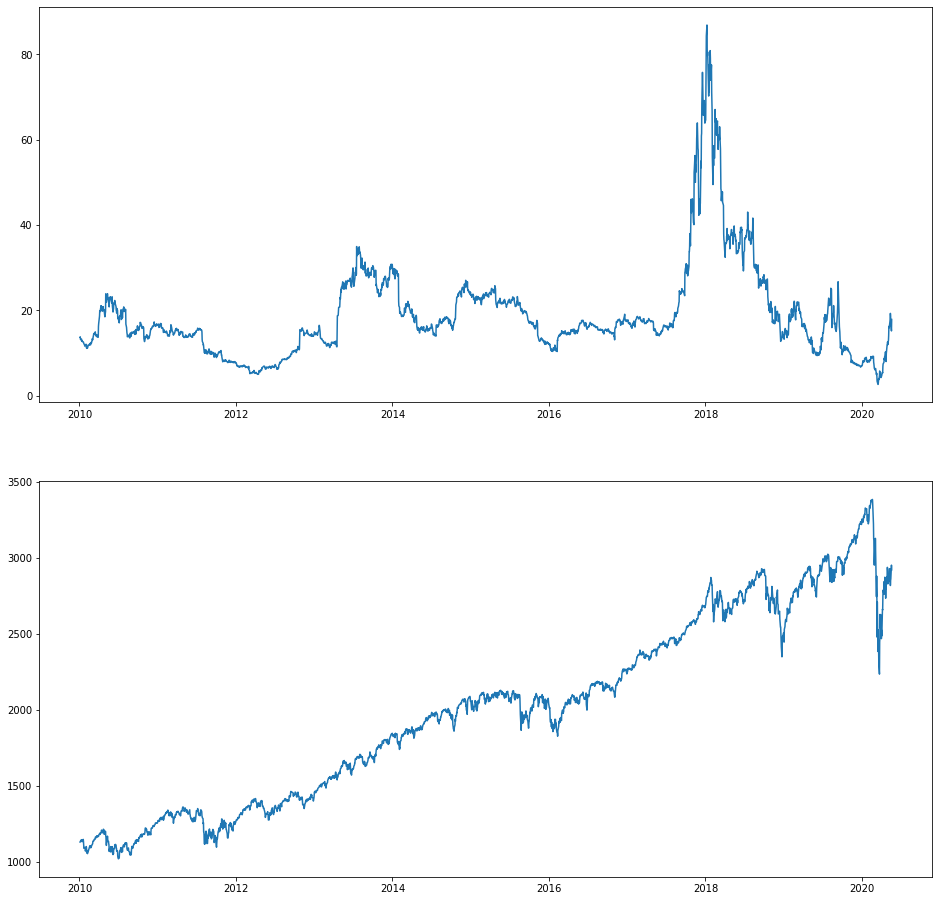

In [11]:
fig, axes = plt.subplots(2,1, figsize = (16,16))
axes[0].plot(overstock)
axes[1].plot(sandp)

## Correlation
- Appears there is somewhat of an inverse correlation to OVerstock and the market. 
- Lets see how much this is. Below we see that the inverse correlation is not as significant. This is for 10 years, so we will look as the last 5 years

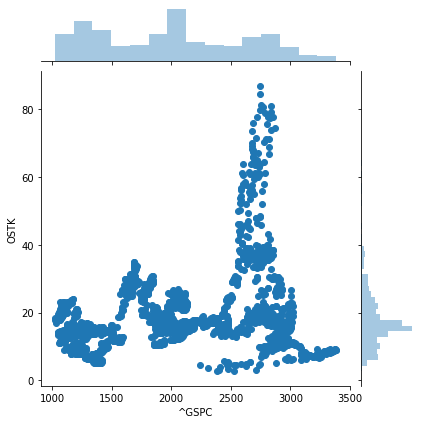

In [12]:
sns.jointplot(x = "^GSPC", y = "OSTK", data=stocks_data)

## The Results 
- THe theory is wrong and OSTK is not inversely correlation to the market
- but are the daily returns of the S&P inversely coorelatied to OSTK 

#### Lets bring in Volatility UVXY , VIX 
-  This will tell us the stocks in the S&P that are coorelatied to the vol market

In [19]:
vix = pd.DataFrame(web.DataReader("^VIX", data_source = "yahoo", start = "2010-1-1"
                                  , end = "2020-05-19")["Adj Close"])

In [21]:
stocks_data["VIX"] = vix

In [25]:
stocks_data.corr()["VIX"].sort_values(ascending = False)

VIX     1.000000
NEM     0.425713
ZTS     0.278235
ESRX    0.232323
PYPL    0.191008
          ...   
BHF    -0.614003
CBS    -0.632804
XOM    -0.704428
FOXA   -0.835169
FOX    -0.844255
Name: VIX, Length: 488, dtype: float64

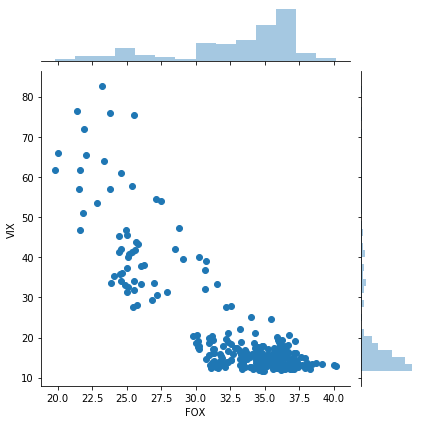

In [26]:
sns.jointplot(x = "FOX", y = "VIX", data=stocks_data)

In [34]:
stocks_data.dropna(axis=1).corr()["VIX"].sort_values()

XOM   -0.704428
IVZ   -0.611394
VTR   -0.597318
HOG   -0.583546
PXD   -0.575430
         ...   
FCX    0.040953
FE     0.058830
AMD    0.187167
NEM    0.425713
VIX    1.000000
Name: VIX, Length: 429, dtype: float64